# Time-frequency analysis of grand LFP mean

Here, we take the mean across all (normalized) channels across all subjects of the peri-event LFP response.

In [1]:
import numpy as np
import pandas as pd
import physutils as phys
import physutils.bootstrap as boot
import physutils.tf as tf
import matplotlib.pyplot as plt
import dbio

%matplotlib inline
np.random.seed(12346)

In [2]:
from time_frequency_helpers import *

In [3]:
# data location
dbname = 'data/bart.hdf5'

# get list of (patient, dataset) tuples to plot
dsets = pd.read_csv('data/lfp_channel_file.csv', header=None).iloc[:, :2].drop_duplicates()

In [4]:
Tpre = -2.5
Tpost = 1.5
freqs = np.exp(np.linspace(np.log(2.5), np.log(50)))
niter = 100
thresh = (0.025, 0.975)
clim = (-3, 3)
baseline_interval = (-6, 5)  # (-1.5, -1.35)
nf = Normalizer(baseline_interval) #phys.norm_by_mean(baseline_interval)

In [5]:
tuplist = [tuple(d) for _, d in dsets.iterrows()]

# Contrast stops - pops

In [6]:
%%time
spectra, labels, taxis, faxis = get_spectra_and_labels(dbname, tuplist,
                                    ['stops', 'pops'], Tpre, Tpost, freqs, normfun=nf)

(14, 1)
(14, 2)
(11, 1)
(12, 1)
(16, 1)
(15, 1)
(16, 2)
(17, 1)
(17, 2)
(18, 1)
(20, 1)
(21, 1)
(22, 1)
(23, 1)
(24, 1)
(25, 1)
(30, 1)
CPU times: user 2.06 s, sys: 25.2 s, total: 27.2 s
Wall time: 4min 30s


In [7]:
ss = np.array(spectra)
img0 = np.mean(ss[labels == 0], axis=0)
img1 = np.mean(ss[labels == 1], axis=0)
cont = img0/img1

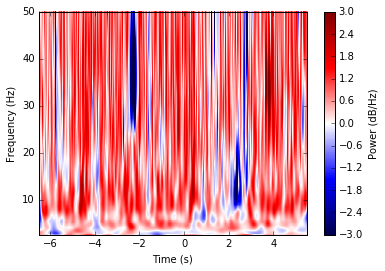

In [8]:
plt.figure(figsize=(10, 10))
T = len(taxis)
make_plot(cont, taxis, faxis, rasterized=True, cmap='seismic', clim=clim);

(14, 2)
(15, 1)
(14, 1)
(12, 1)
(11, 1)
(16, 1)
(16, 2)
(17, 1)
(17, 2)
(18, 1)
(20, 1)
(21, 1)
(22, 1)
(23, 1)
(24, 1)
(25, 1)
(30, 1)
CPU times: user 21min 49s, sys: 7min 16s, total: 29min 5s
Wall time: 32min 55s


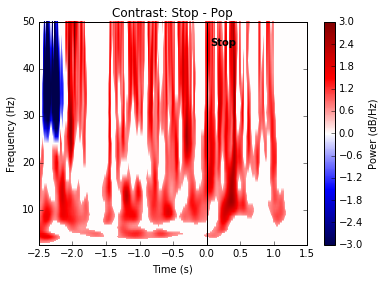

In [9]:
%%time

contrast0, fig = significant_time_frequency(dbname, tuplist, ['stops', 'pops'], 
                                           Tpre, Tpost,
                                           freqs, thresh, normfun=nf, niter=niter, 
                                           rasterized=True, cmap='seismic', clim=clim);

# decorations
plt.axvline(x=0, color='k')
plt.text(0.05, 45, 'Stop', fontweight='bold')

plt.title('Contrast: Stop - Pop')

plt.tick_params(axis='x', which='both', top='off');

# Control for motor movement

Free stops and starts contain the same joystick response.

(14, 1)
(17, 1)
(14, 2)
(11, 1)
(15, 1)
(16, 1)
(12, 1)
(16, 2)
(17, 2)
(18, 1)
(20, 1)
(21, 1)
(22, 1)
(23, 1)
(24, 1)
(25, 1)
(30, 1)
CPU times: user 39min 27s, sys: 12min 47s, total: 52min 14s
Wall time: 57min 26s


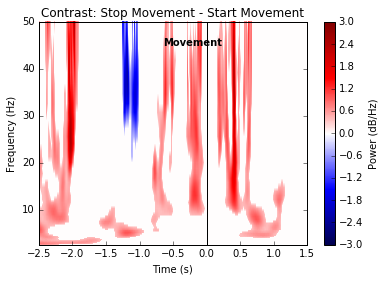

In [10]:
%%time
contrast1, fig = significant_time_frequency(dbname, tuplist, ['stops_free', 'starts'], 
                                           Tpre, Tpost,
                                           freqs, thresh, normfun=nf, niter=niter, 
                                           rasterized=True, cmap='seismic', clim=clim);

# decorations
plt.axvline(x=0, color='k')
plt.text(-0.65, 45, 'Movement', fontweight='bold')

plt.title('Contrast: Stop Movement - Start Movement')

plt.tick_params(axis='x', which='both', top='off');

# Contrast voluntary and involuntary stops

(14, 2)
(15, 1)
(11, 1)
(12, 1)
(16, 2)
(16, 1)
(17, 1)
(14, 1)
Dataset (14, 1) has no events of type stops_control
(17, 2)
Dataset (17, 1) has no events of type stops_control
(18, 1)
Dataset (14, 2) has no events of type stops_control
(20, 1)
Dataset (12, 1) has no events of type stops_control
(21, 1)
Dataset (16, 1) has no events of type stops_control
(22, 1)
Dataset (11, 1) has no events of type stops_control
(23, 1)
Dataset (15, 1) has no events of type stops_control
(24, 1)
Dataset (16, 2) has no events of type stops_control
(25, 1)
(30, 1)
Dataset (17, 2) has no events of type stops_control
Dataset (18, 1) has no events of type stops_control
CPU times: user 3min 50s, sys: 1min 5s, total: 4min 55s
Wall time: 7min 22s


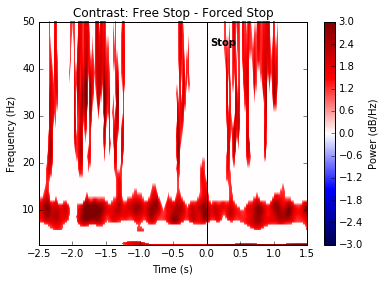

In [11]:
%%time
contrast2, fig = significant_time_frequency(dbname, tuplist, ['stops_free', 'stops_control'], Tpre, Tpost,
                           freqs, thresh, normfun=nf, niter=niter, 
                           rasterized=True, cmap='seismic', clim=clim);

# decorations
plt.axvline(x=0, color='k')
plt.text(0.05, 45, 'Stop', fontweight='bold')

plt.title('Contrast: Free Stop - Forced Stop')

plt.tick_params(axis='x', which='both', top='off');